In [1]:
#!pip install -q wot

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import wot

Load transport map model and cell sets

In [3]:
tmap_model = wot.tmap.TransportMapModel.from_directory('tmaps/serum')
cell_sets = wot.io.read_sets('data/cell_sets.gmt', as_dict=True)

Convert cell sets indicating whether a cell at time t is in a cell set

In [4]:
start_populations = tmap_model.population_from_cell_sets(cell_sets, at_time=12)
end_populations = tmap_model.population_from_cell_sets(cell_sets, at_time=18)

Compute transition table 

In [5]:
transition_table = tmap_model.transition_table(start_populations, end_populations)

Visualize transition table as heat map

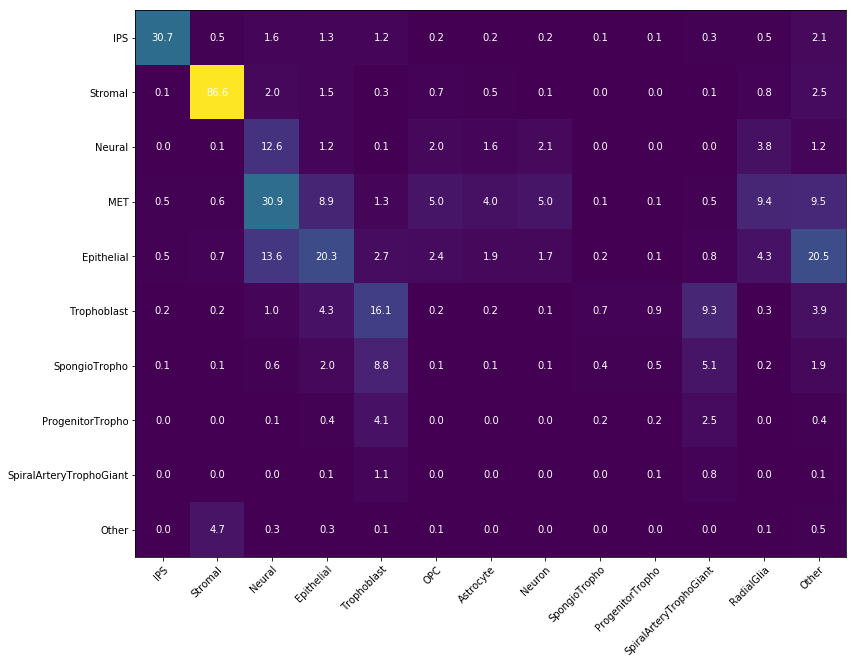

In [6]:
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(transition_table.X)

# We want to show all ticks...
ax.set_xticks(np.arange(len(transition_table.var_names)))
ax.set_yticks(np.arange(len(transition_table.obs_names)))
# ... and label them with the respective list entries
ax.set_xticklabels(transition_table.var_names)
ax.set_yticklabels(transition_table.obs_names)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(transition_table.shape[0]):
    for j in range(transition_table.shape[1]):
        text = ax.text(j, i, '{:.1f}'.format(transition_table.X[i, j]),
                       ha="center", va="center", color="w")
fig.tight_layout()